## The Sparks Foundation - GRIP - Data Science And Business Analytics - FEB2021

### TASK 2: Prediction using Unsupervised ML

### Author: Ashwika R. Ghumate

### Dataset used:  ‘Iris’ dataset
- Data can be downloaded through the following link -  https://bit.ly/3kXTdox

### Problem Statement(s)
- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset from the csv file

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
X = iris.iloc[:,1:5].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Finding the optimum number of clusters for k-mean classification

In [4]:
from sklearn.cluster import KMeans
k_range = range(1,11)
SSE = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(X)
    SSE.append(km.inertia_)

In [5]:
SSE

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.53558205128205,
 38.930963049671746,
 34.1967910993998,
 29.955568877177576,
 28.094281507168844,
 26.296423855532556]

### Plotting the dataset and identifying elbow

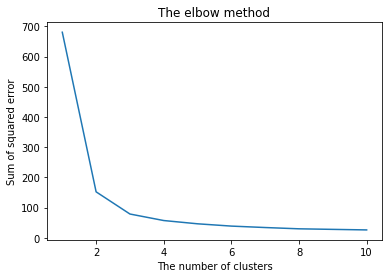

In [6]:
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_range, SSE)
plt.show()

#### From the above graph, the optimum clusters is where the elbow occurs. 
-From this we choose the number of clusters as 3.

### Applying k-means to dataset

In [7]:
km = KMeans(n_clusters =3)
y_predict = km.fit_predict(X)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [8]:
iris['Cluster'] = y_predict
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
5,6,5.4,3.9,1.7,0.4,Iris-setosa,0
6,7,4.6,3.4,1.4,0.3,Iris-setosa,0
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0
8,9,4.4,2.9,1.4,0.2,Iris-setosa,0
9,10,4.9,3.1,1.5,0.1,Iris-setosa,0


### Visualizing the clusters on the first two columns

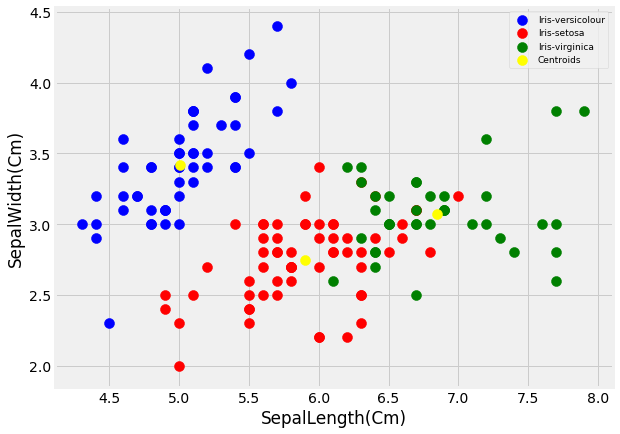

In [9]:
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
df1 = iris[iris.Cluster==0]
df2 = iris[iris.Cluster==1]
df3 = iris[iris.Cluster==2]

plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'], s=100, color='blue', label='Iris-versicolour')
plt.scatter(df2['SepalLengthCm'], df2['SepalWidthCm'], s=100, color='red', label='Iris-setosa')
plt.scatter(df3['SepalLengthCm'], df3['SepalWidthCm'], s=100, color='green', label='Iris-virginica')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, color='yellow', label='Centroids')

plt.xlabel('SepalLength(Cm)')
plt.ylabel('SepalWidth(Cm)')
plt.legend(loc =1, prop={'size':9})